# Tutorial Goal

This tutorial aims to show how RTApp performance metrics are computed
and reported by the **perf analysis** module provided by LISA.

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

2017-07-14 15:08:38,135 INFO    : root         : Using LISA logging configuration:
2017-07-14 15:08:38,146 INFO    : root         :   /data/lisa_remote/lisa/logging.conf


In [2]:
# Execute this cell to report devlib debugging information
logging.getLogger('ssh').setLevel(logging.DEBUG)

In [3]:
# Generate plots inline
%pylab inline

import json
import os

Populating the interactive namespace from numpy and matplotlib


# Collected results

In [4]:
# Let's use an example trace
res_dir = './example_rtapp'

trace_file = os.path.join(res_dir, 'trace.dat')
platform_file = os.path.join(res_dir, 'platform.json')
!tree {res_dir}

./example_rtapp
├── example2_00.json
├── output.log
├── platform.json
├── rt-app-task_ramp-0.log
├── task_perf_task_ramp.png
├── trace.dat
├── trace.raw.txt
└── trace.txt

0 directories, 8 files


In [5]:
# Inspect the JSON file used to run the application
with open('{}/example2_00.json'.format(res_dir), 'r') as fh:
    rtapp_json = json.load(fh, )
logging.info('Generated RTApp JSON file:')
print json.dumps(rtapp_json, indent=4, sort_keys=True)

2017-07-14 15:08:49,741 INFO    : root         : Generated RTApp JSON file:


{
    "global": {
        "calibration": 226, 
        "default_policy": "SCHED_OTHER", 
        "duration": -1, 
        "logdir": "/data/local/tmp/devlib-target"
    }, 
    "tasks": {
        "task_ramp": {
            "cpus": [
                4
            ], 
            "loop": 1, 
            "phases": {
                "p000001": {
                    "loop": 100, 
                    "run": 1000, 
                    "timer": {
                        "period": 10000, 
                        "ref": "task_ramp"
                    }
                }, 
                "p000002": {
                    "loop": 20, 
                    "run": 5000, 
                    "timer": {
                        "period": 50000, 
                        "ref": "task_ramp"
                    }
                }, 
                "p000003": {
                    "loop": 20, 
                    "run": 15000, 
                    "timer": {
                        "period": 50000, 
       

# Trace inspection

In [6]:
# Suport for FTrace events parsing and visualization
import trappy

# NOTE: The interactive trace visualization is available only if you run
#       the workload to generate a new trace-file
trappy.plotter.plot_trace(res_dir)

# RTApp task performance plots

2017-07-14 15:08:56,158 INFO    : PerfAnalysis : PerfIndex, Task [task_ramp] avg: 0.94, std: 0.07


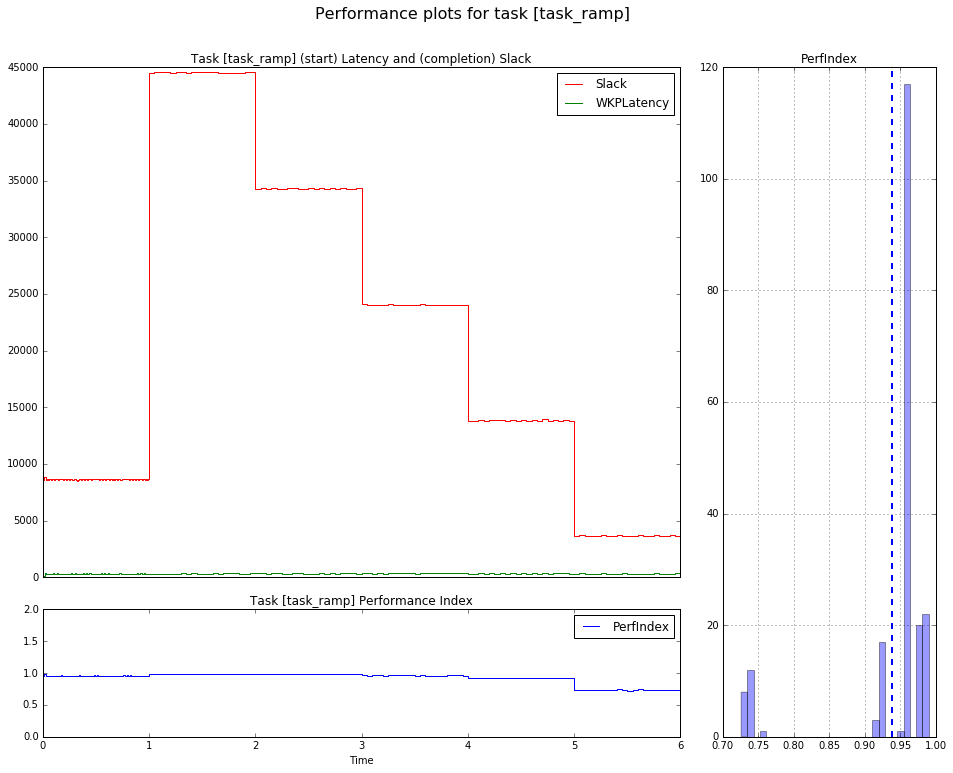

In [7]:
# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Parse the RT-App generate log files to compute performance metrics
pa = PerfAnalysis(res_dir)

# For each task which has generated a logfile, plot  its performance metrics
for task in pa.tasks():
    pa.plotPerf(task, "Performance plots for task [{}] ".format(task))